# Module 7 Practice Exercise

Goal: Work with A/B testing, estimation

In this exercise we work with the deflategate dataset, which is used in the textbook. In 2015 the Indianapolis Colts and the New England Patriots played the championship game to determine which of them would play in the Super Bowl. After the game, some people thought the Patriots’ football had been deflated so it was softer, making it easier to catch and giving the team an unfair advantage.

In the first part of the exercise we will investigate whether the Patriot's football is likely to be deflated.<br>
The dataset below has measurements of the football's air pressure, or how much it has been inflated. The measurements of the ball were taken throughout the game by two officials.

We're also given that at the beginning of the game, the Patriots' football was at 12.5 psi, and the Colts' football was at 13 psi.

1. Run the Code cell below to read in data and store in a DataFrame named **`football`**.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/DeAnzaDataScience/CIS11/refs/heads/main/datasets_exercises/deflategate.csv'
football = pd.read_csv(url)
football

,Team,Blakeman,Prioleau
0,Patriots,11.50,11.80
1,Patriots,10.85,11.20
2,Patriots,11.15,11.50
3,Patriots,10.70,11.00
4,Patriots,11.10,11.45
5,Patriots,11.60,11.95
6,Patriots,11.85,12.30
7,Patriots,11.10,11.55
8,Patriots,10.95,11.35
9,Patriots,10.50,10.90


Each row is a measurement of the football during the game, and there are 2 readings from the 2 officials. There happened to be more measurements of the Patriots' footballs than of the Colts' footballs.

2. Since the 2 readings are slightly different, we take the average of the 2 readings and make that the reading of the ball.
- Find the average of the 2 readings by adding code to do these tasks:
> - select the **`Blakeman`** and **`Prioleau`** column of the **`football`** DataFrame
> - and add **`.mean(axis=1)`** to call the **`mean`** method with axis=1 to calculate the mean for each row
> - Store the result as a new column of **`football`** and name it **`psi`**, the unit of air pressure (pounds per square inch).

In [ ]:
football['psi'] = football[['Blakeman','Prioleau']].mean(axis=1)
football

,Team,Blakeman,Prioleau,psi
0,Patriots,11.50,11.80,11.650
1,Patriots,10.85,11.20,11.025
2,Patriots,11.15,11.50,11.325
3,Patriots,10.70,11.00,10.850
4,Patriots,11.10,11.45,11.275
5,Patriots,11.60,11.95,11.775
6,Patriots,11.85,12.30,12.075
7,Patriots,11.10,11.55,11.325
8,Patriots,10.95,11.35,11.150
9,Patriots,10.50,10.90,10.700


3. Fill in the code below to find the average drop in **`psi`** for the Patriots' football and Colts' football.

In [ ]:
# get the football psi column for Patriots
patriots_psi =  football[football["Team"] == "Patriots"]['psi']
# print(patriots_psi)

# get the football psi column for Colts
colts_psi =   football[football["Team"] == "Colts"]['psi']

# find the drop in psi for patriots
patriots_drop = 12.5 - patriots_psi

# find the drop in psi for colts
colts_drop = 13 - colts_psi

# store the psi drop as a new colum in the football DataFrame
football['drop'] = patriots_drop.to_list() + colts_drop.to_list()
display(football)

# find and print the average drop for each team
print("Average drop for Patriots:",np.mean(patriots_drop)   )
print("Average drop for Colts:",np.mean(colts_drop ))
print("Difference in psi drop:", np.mean(patriots_drop-np.mean(colts_drop) ))

,Team,Blakeman,Prioleau,psi,drop
0,Patriots,11.50,11.80,11.650,0.850
1,Patriots,10.85,11.20,11.025,1.475
2,Patriots,11.15,11.50,11.325,1.175
3,Patriots,10.70,11.00,10.850,1.650
4,Patriots,11.10,11.45,11.275,1.225
5,Patriots,11.60,11.95,11.775,0.725
6,Patriots,11.85,12.30,12.075,0.425
7,Patriots,11.10,11.55,11.325,1.175
8,Patriots,10.95,11.35,11.150,1.350
9,Patriots,10.50,10.90,10.700,1.800


Average drop for Patriots: 1.202272727272728
Average drop for Colts: 0.46875
Difference in psi drop: 0.733522727272728


It looks like the psi drop of the Patriots' football is larger than the psi drop of the Colts' football.<br>
But could the difference in psi drop be due to chance?

To find out, we formulate the null hypothesis and alternate hypothesis, then we run a simulation to see which hypothesis is rejected.

4. Fill in the two hypotheses.

Null hypothesis:  **any difference is due to chance.**
   
Alternative hypothesis:  ***Something else is causing the difference.***

5. The test statistic is the **difference** in **psi drop**.<br>
We need to conduct a simulation to find what the psi drop due to chance is, then we can compare it with the actual psi drop that was measured.

6. Perform random permutation to simulate random chance.

Fill in the code to randomly shuffle the **`Team`** column and store it as a new column named **`shuffled`**.

In [ ]:
shuffled =  football["Team"].sample(frac =1,replace = False)
# print(shuffled)
football["shuffled"] =  shuffled.reset_index(drop = True)
football

,Team,Blakeman,Prioleau,psi,drop,shuffled
0,Patriots,11.50,11.80,11.650,0.850,Patriots
1,Patriots,10.85,11.20,11.025,1.475,Colts
2,Patriots,11.15,11.50,11.325,1.175,Colts
3,Patriots,10.70,11.00,10.850,1.650,Colts
4,Patriots,11.10,11.45,11.275,1.225,Patriots
5,Patriots,11.60,11.95,11.775,0.725,Patriots
6,Patriots,11.85,12.30,12.075,0.425,Colts
7,Patriots,11.10,11.55,11.325,1.175,Patriots
8,Patriots,10.95,11.35,11.150,1.350,Patriots
9,Patriots,10.50,10.90,10.700,1.800,Patriots


7. Now that the **`shuffled`** teams and the psi **`drop`** are randomly paired together, we find the average drop by writing a function named **`average_drop`** which will:
- accept a column name, where the column contains a team name
- find the average drop of **Patriots**
- find the average drop of **Colts**
- find and **return the difference**

Then we run the function with the original teams above to check that it still gives us the same **0.73 difference**.

In [ ]:
def average_drop(column):
    patriots_average =  np.mean(football[football[column] == 'Patriots']['drop'])
    colts_average =   np.mean(football[football[column] == 'Colts']['drop'])

    return patriots_average - colts_average

print(average_drop("Team"))

0.733522727272728


8. Fill in the code below to:
- Simulate the **random shuffling** and finding the **average drop** by **looping and repeating** these tasks **10,000 **times
- Save the **10,000** average drops in a list L
- Convert the list L to an array named **`drop_array`** when the list is filled.

In [ ]:
L = []
for i in range(10000):
  # shuffle the teams and store in column "shuffled"
    shuffled = football["Team"].sample(frac = 1, replace = False)
    football['shuffled'] = shuffled.reset_index(drop = True)

  # find average drop and store in list L
    L.append(average_drop('shuffled'))


drop_array = np.array(L)
print(drop_array)

[-0.34886364  0.32443182 -0.20397727 ...  0.12840909  0.01761364
 -0.13579545]


9. Fill in the code below to plot the distribution of **the average drops**

[]

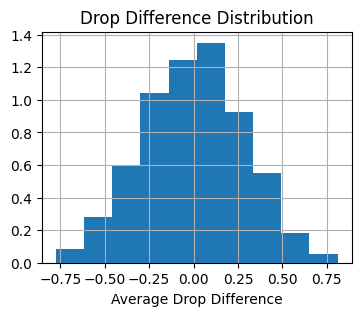

In [ ]:
plt.figure(figsize=(4, 3))
plt.hist(drop_array, density = True)

plt.title("Drop Difference Distribution")
plt.xlabel("Average Drop Difference")
plt.grid()
plt.plot()

10. Given the distribution above, and given that the measured difference is 0.73, calculate the p-value.

In [ ]:
pvalue = np.count_nonzero(drop_array >= 0.73)/10000
print("p-value:", pvalue)

p-value: 0.0017


11. Given the p-value that from step 10, does it reject the null hypothesis?  Why or why not?

The p-value is very small so we reject the null hypothsis.

---

In the second part of the exercise, from the 11 measurements of the Patriots' footballs, we want to estimate the average psi of the Patriots' footballs in other games, assuming that they were also deflated.

12. Run the following Code cell to see the 11 measurements of the Patriots' footballs.

In [ ]:
psi_drop = football[football["Team"] == "Patriots"]["drop"]
print(psi_drop)
print("Average drop:", np.mean(psi_drop))

0     0.850
1     1.475
2     1.175
3     1.650
4     1.225
5     0.725
6     0.425
7     1.175
8     1.350
9     1.800
10    1.375
Name: drop, dtype: float64
Average drop: 1.202272727272728


13. Write a function named **`resample`** that will:
- use the bootstrap to create a new sample from the **`psi_drop`**
- return the mean psi drop of the sample

Then run **`resample`** to print the average psi drop

In [ ]:
def resample():
  a_resample = psi_drop.sample(n=11, replace=True)
  return np.mean(a_resample)

print(resample())

1.3000000000000007


14. Run **`resample`** **10,000** times and save the average psi drop in a list L, then convert the list L to an array named **`psi_drop_array`**.

In [ ]:
L = []
for i in range(10000):
    L.append(resample())
psi_drop_array = np.array(L)

15. Find the **mean psi** drop for the Patriots' footballs with a **95% confidence interval**.

In [ ]:
lower_limit = np.percentile(psi_drop_array, 2.5)
upper_limit = np.percentile(psi_drop_array, 97.5)
print("PSI drop with 95% confidence is between", round(lower_limit,2), "and", round(upper_limit,2))

PSI drop with 95% confidence is between 0.97 and 1.43
